<center>
  <h1 style="color:#0033A0">SKYHACK 2.0</h1>
</center>

<center>
<h4>Optimize key call center metrics, such as Average Handle Time (AHT) and Average Speed to Answer (AST), to improve operational efficiency and customer satisfaction. Analyze existing call center data to identify inefficiencies and recommend strategies for faster, more effective service<h4>
</center>


<h3 style="color:#0033A0">Importing Python Libraries</h3>


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


<h3 style="color:#0033A0">Converting csv files to dataframe </h3>

In [3]:
calls_df = pd.read_csv("callsf0d4f5a.csv")
customers_df = pd.read_csv("customers2afd6ea.csv")
reasons_df = pd.read_csv("reason18315ff.csv")
sentiments_df = pd.read_csv("sentiment_statisticscc1e57a.csv")

<h3 style="color:#0033A0"> Displaying DataFrames </h3>

In [4]:
calls_df

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript
0,4667960400,2033123310,963118,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...
1,1122072124,8186702651,519057,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18,\n\nAgent: Thank you for calling United Airlin...
2,6834291559,2416856629,158319,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26,\n\nAgent: Thank you for calling United Airlin...
3,2266439882,1154544516,488324,8/1/2024 0:05,8/1/2024 0:10,8/1/2024 0:17,\n\nAgent: Thank you for calling United Airlin...
4,1211603231,5214456437,721730,8/1/2024 0:04,8/1/2024 0:14,8/1/2024 0:23,\n\nAgent: Thank you for calling United Airlin...
...,...,...,...,...,...,...,...
71805,1563273072,8022667294,413148,8/31/2024 23:48,8/31/2024 23:57,9/1/2024 0:25,\n\nAgent: Thank you for calling United Airlin...
71806,8865997781,4474867021,980156,8/31/2024 23:55,8/31/2024 23:58,9/1/2024 0:06,\n\nAgent: Thank you for calling United Airlin...
71807,8019240181,9762042472,616988,8/31/2024 23:52,8/31/2024 23:58,9/1/2024 0:04,\n\nAgent: Thank you for calling United Airlin...
71808,8332067080,8095620266,161354,8/31/2024 23:53,8/31/2024 23:59,9/1/2024 0:03,\n\nAgent: Thank you for calling United Airlin...


In [5]:
customers_df

,customer_id,customer_name,elite_level_code
0,2033123310,Matthew Foster,4.0
1,8186702651,Tammy Walters,NaN
2,2416856629,Jeffery Dixon,NaN
3,1154544516,David Wilkins,2.0
4,5214456437,Elizabeth Daniels,0.0
...,...,...,...
71805,8022667294,Dennis Singleton DDS,NaN
71806,4474867021,Paul Mitchell,1.0
71807,9762042472,Kaylee Lang,NaN
71808,8095620266,Christine Oneal,1.0


In [6]:
reasons_df

,call_id,primary_call_reason
0,4667960400,Voluntary Cancel
1,1122072124,Booking
2,6834291559,IRROPS
3,2266439882,Upgrade
4,1211603231,Seating
...,...,...
66648,7569738090,Mileage Plus
66649,1563273072,Post Flight
66650,8865997781,Upgrade
66651,8019240181,Upgrade


In [7]:
sentiments_df

,call_id,agent_id,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,4667960400,963118,neutral,angry,-0.04,0.39
1,1122072124,519057,calm,neutral,0.02,0.35
2,6834291559,158319,neutral,polite,-0.13,0.32
3,2266439882,488324,neutral,frustrated,-0.20,0.20
4,1211603231,721730,neutral,polite,-0.05,0.35
...,...,...,...,...,...,...
71805,1563273072,413148,calm,calm,0.05,0.34
71806,8865997781,980156,calm,frustrated,0.03,0.22
71807,8019240181,616988,calm,polite,0.05,0.42
71808,8332067080,161354,neutral,polite,-0.07,0.13


<h3 style="color:#0033A0"> Merging DataFrames </h3>
Here we merged different dataframes, it allows having all relevant information in one dataset allows you to analyze relationships between different features.

 We have used join as "left" because as in call center analysis, we might want to retain all calls , even if some of the calls don’t have corresponding customer details or sentiment data (e.g., if some customers are missing from customers_df) as it ensures that you still get all the calls, and it will show you where customer information is missing with NaN

In [8]:
# merged different csv_files dataframe to make a master dataframe to analyze 
merged_df = pd.merge(calls_df, customers_df, on='customer_id', how='left')
merged_df = pd.merge(merged_df,reasons_df, on='call_id', how='left')
master_df = pd.merge(merged_df,sentiments_df, on='call_id', how='left')


In [9]:
final_master_df = master_df.drop('agent_id_y', axis=1) # dropped one duplicate column i.e agent_id

In [10]:
final_master_df = final_master_df.rename(columns={'agent_id_x': 'agent_id'}) #renamed agent_id_x to original agent_id

<h3 style="color:#0033A0"> Displaying Final Master DataFrame </h3>

In [11]:
final_master_df

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,customer_name,elite_level_code,primary_call_reason,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,4667960400,2033123310,963118,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...,Matthew Foster,4.0,Voluntary Cancel,neutral,angry,-0.04,0.39
1,1122072124,8186702651,519057,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18,\n\nAgent: Thank you for calling United Airlin...,Tammy Walters,NaN,Booking,calm,neutral,0.02,0.35
2,6834291559,2416856629,158319,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26,\n\nAgent: Thank you for calling United Airlin...,Jeffery Dixon,NaN,IRROPS,neutral,polite,-0.13,0.32
3,2266439882,1154544516,488324,8/1/2024 0:05,8/1/2024 0:10,8/1/2024 0:17,\n\nAgent: Thank you for calling United Airlin...,David Wilkins,2.0,Upgrade,neutral,frustrated,-0.20,0.20
4,1211603231,5214456437,721730,8/1/2024 0:04,8/1/2024 0:14,8/1/2024 0:23,\n\nAgent: Thank you for calling United Airlin...,Elizabeth Daniels,0.0,Seating,neutral,polite,-0.05,0.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71805,1563273072,8022667294,413148,8/31/2024 23:48,8/31/2024 23:57,9/1/2024 0:25,\n\nAgent: Thank you for calling United Airlin...,Dennis Singleton DDS,NaN,Post Flight,calm,calm,0.05,0.34
71806,8865997781,4474867021,980156,8/31/2024 23:55,8/31/2024 23:58,9/1/2024 0:06,\n\nAgent: Thank you for calling United Airlin...,Paul Mitchell,1.0,Upgrade,calm,frustrated,0.03,0.22
71807,8019240181,9762042472,616988,8/31/2024 23:52,8/31/2024 23:58,9/1/2024 0:04,\n\nAgent: Thank you for calling United Airlin...,Kaylee Lang,NaN,Upgrade,calm,polite,0.05,0.42
71808,8332067080,8095620266,161354,8/31/2024 23:53,8/31/2024 23:59,9/1/2024 0:03,\n\nAgent: Thank you for calling United Airlin...,Christine Oneal,1.0,NaN,neutral,polite,-0.07,0.13


<h3 style="color:#0033A0"> Calculating Handle Time and Speed to answer </h3>

We are calculating handle time and Speed to answer for each call_id so that we will be better doing analysis for AHT and AST

In [12]:
# Ensuring datetime columns are properly formatted
final_master_df['call_start_datetime'] = pd.to_datetime(final_master_df['call_start_datetime'])
final_master_df['agent_assigned_datetime'] = pd.to_datetime(final_master_df['agent_assigned_datetime'])
final_master_df['call_end_datetime'] = pd.to_datetime(final_master_df['call_end_datetime'])

# Calculated Handle Time (HT) in seconds and added it as a new column
final_master_df['handle_time'] = (final_master_df['call_end_datetime'] - final_master_df['agent_assigned_datetime']).dt.total_seconds()

# Calculated Speed to Answer (ST) in seconds and added it as a new column
final_master_df['speed_to_answer'] = (final_master_df['agent_assigned_datetime'] - final_master_df['call_start_datetime']).dt.total_seconds()



In [13]:
# Displaying the updated dataframe
final_master_df

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,customer_name,elite_level_code,primary_call_reason,agent_tone,customer_tone,average_sentiment,silence_percent_average,handle_time,speed_to_answer
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,Matthew Foster,4.0,Voluntary Cancel,neutral,angry,-0.04,0.39,1860.0,420.0
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,Tammy Walters,NaN,Booking,calm,neutral,0.02,0.35,720.0,180.0
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,Jeffery Dixon,NaN,IRROPS,neutral,polite,-0.13,0.32,1140.0,480.0
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,David Wilkins,2.0,Upgrade,neutral,frustrated,-0.20,0.20,420.0,300.0
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,Elizabeth Daniels,0.0,Seating,neutral,polite,-0.05,0.35,540.0,600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71805,1563273072,8022667294,413148,2024-08-31 23:48:00,2024-08-31 23:57:00,2024-09-01 00:25:00,\n\nAgent: Thank you for calling United Airlin...,Dennis Singleton DDS,NaN,Post Flight,calm,calm,0.05,0.34,1680.0,540.0
71806,8865997781,4474867021,980156,2024-08-31 23:55:00,2024-08-31 23:58:00,2024-09-01 00:06:00,\n\nAgent: Thank you for calling United Airlin...,Paul Mitchell,1.0,Upgrade,calm,frustrated,0.03,0.22,480.0,180.0
71807,8019240181,9762042472,616988,2024-08-31 23:52:00,2024-08-31 23:58:00,2024-09-01 00:04:00,\n\nAgent: Thank you for calling United Airlin...,Kaylee Lang,NaN,Upgrade,calm,polite,0.05,0.42,360.0,360.0
71808,8332067080,8095620266,161354,2024-08-31 23:53:00,2024-08-31 23:59:00,2024-09-01 00:03:00,\n\nAgent: Thank you for calling United Airlin...,Christine Oneal,1.0,NaN,neutral,polite,-0.07,0.13,240.0,360.0


<h3 style="color:#0033A0"> Data Cleaning Steps </h3>

1. **Handle Missing Values**: Remove or impute missing values.  
2. **Remove Duplicates**: Drop duplicate rows.  
3. **Check Data Types**: Ensure columns have the correct data types.  
4. **Handle Outliers**: Detect and manage outliers in numerical data.  
5. **Check Data Consistency**: Ensure logical consistency in time-related and numerical fields.  
6. **Ensure Categorical Consistency**: Correct any inconsistencies in categorical values.  
7. **Text Standarization**: ensure consistency in text formatting.  


In [14]:
final_master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71810 entries, 0 to 71809
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   call_id                  71810 non-null  int64         
 1   customer_id              71810 non-null  int64         
 2   agent_id                 71810 non-null  int64         
 3   call_start_datetime      71810 non-null  datetime64[ns]
 4   agent_assigned_datetime  71810 non-null  datetime64[ns]
 5   call_end_datetime        71810 non-null  datetime64[ns]
 6   call_transcript          71810 non-null  object        
 7   customer_name            71810 non-null  object        
 8   elite_level_code         46043 non-null  float64       
 9   primary_call_reason      66653 non-null  object        
 10  agent_tone               71593 non-null  object        
 11  customer_tone            71810 non-null  object        
 12  average_sentiment        71701 n

<h3 style="color:#0033A0"> Handling Misssing Values </h3>

In [15]:
missing_values = final_master_df.isnull().sum()

In [16]:
print(missing_values)

call_id                        0
customer_id                    0
agent_id                       0
call_start_datetime            0
agent_assigned_datetime        0
call_end_datetime              0
call_transcript                0
customer_name                  0
elite_level_code           25767
primary_call_reason         5157
agent_tone                   217
customer_tone                  0
average_sentiment            109
silence_percent_average        0
handle_time                    0
speed_to_answer                0
dtype: int64


In [17]:
# Separated numeric and non-numeric columns
numeric_cols = final_master_df.select_dtypes(include=[np.number]).columns
non_numeric_cols = final_master_df.select_dtypes(exclude=[np.number]).columns

In [18]:
# Filled missing values for numeric columns with median
final_master_df[numeric_cols] = final_master_df[numeric_cols].fillna(final_master_df[numeric_cols].median())

In [19]:
# Filled missing values for non-numeric columns with mode
for col in non_numeric_cols:
    final_master_df[col] = final_master_df[col].fillna(final_master_df[col].mode()[0])  # Use mode for categorical columns

In [20]:
final_master_df.isnull().sum()

call_id                    0
customer_id                0
agent_id                   0
call_start_datetime        0
agent_assigned_datetime    0
call_end_datetime          0
call_transcript            0
customer_name              0
elite_level_code           0
primary_call_reason        0
agent_tone                 0
customer_tone              0
average_sentiment          0
silence_percent_average    0
handle_time                0
speed_to_answer            0
dtype: int64

<h3 style="color:#0033A0"> Remove Duplicates </h3>

In [21]:
duplicates = final_master_df.duplicated().sum()

In [22]:
print(duplicates)

0


<h3 style="color:#0033A0"> Check Data Types </h3>


In [23]:
final_master_df.dtypes

call_id                             int64
customer_id                         int64
agent_id                            int64
call_start_datetime        datetime64[ns]
agent_assigned_datetime    datetime64[ns]
call_end_datetime          datetime64[ns]
call_transcript                    object
customer_name                      object
elite_level_code                  float64
primary_call_reason                object
agent_tone                         object
customer_tone                      object
average_sentiment                 float64
silence_percent_average           float64
handle_time                       float64
speed_to_answer                   float64
dtype: object

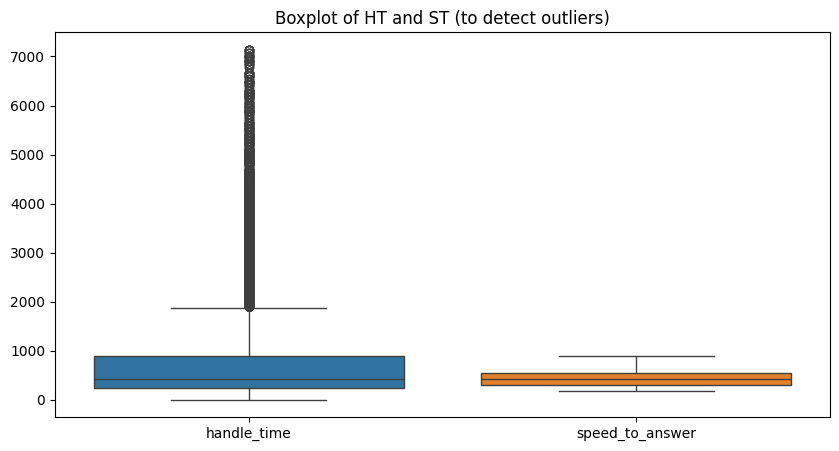

In [24]:
# Plotted a boxplot for numerical columns to check for outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=final_master_df[['handle_time', 'speed_to_answer']])
plt.title('Boxplot of HT and ST (to detect outliers)')
plt.show()


<h3 style="color:#0033A0"> Counting and Identifying Outliers </h3>

In [25]:
column_name = 'handle_time'

# Calculated Q1 (25th percentile) and Q3 (75th percentile)
Q1 = final_master_df[column_name].quantile(0.25)
Q3 = final_master_df[column_name].quantile(0.75)

# Calculated IQR
IQR = Q3 - Q1

# Determined bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifed outliers
outliers = final_master_df[(final_master_df[column_name] < lower_bound) | (final_master_df[column_name] > upper_bound)]

# Counted the number of outliers
num_outliers = outliers.shape[0]

In [26]:
num_outliers

5047

<h3 style="color:#0033A0"> Check Data Consistency </h3>

In [27]:
# Checked for negative or zero values in HT and ST
invalid_HT_ST = final_master_df[(final_master_df['handle_time'] < 0) | (final_master_df['speed_to_answer'] <= 0)]

In [28]:
print(invalid_HT_ST)

Empty DataFrame
Columns: [call_id, customer_id, agent_id, call_start_datetime, agent_assigned_datetime, call_end_datetime, call_transcript, customer_name, elite_level_code, primary_call_reason, agent_tone, customer_tone, average_sentiment, silence_percent_average, handle_time, speed_to_answer]
Index: []


In [29]:
# Checked for inconsistencies in datetime columns (e.g., end time should be after start time)
inconsistent_times = final_master_df[final_master_df['call_end_datetime'] < final_master_df['agent_assigned_datetime']]

In [30]:
# Printed rows with inconsistent times
print("Rows with inconsistent datetime values:")
print(inconsistent_times)

Rows with inconsistent datetime values:
Empty DataFrame
Columns: [call_id, customer_id, agent_id, call_start_datetime, agent_assigned_datetime, call_end_datetime, call_transcript, customer_name, elite_level_code, primary_call_reason, agent_tone, customer_tone, average_sentiment, silence_percent_average, handle_time, speed_to_answer]
Index: []


In [31]:
description_elc = final_master_df["elite_level_code"].describe()     #description for elite_level_code

In [32]:
description_elc

count    71810.000000
mean         1.237794
std          1.073646
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          5.000000
Name: elite_level_code, dtype: float64

In [33]:
description_spa = final_master_df["silence_percent_average"].describe()     #description for silent_percent_average

In [34]:
description_spa

count    71810.000000
mean         0.285515
std          0.192031
min          0.000000
25%          0.130000
50%          0.260000
75%          0.410000
max          0.980000
Name: silence_percent_average, dtype: float64

In [35]:
description_as = final_master_df["average_sentiment"].describe()     #description for average_sentiment

In [36]:
description_as

count    71810.000000
mean        -0.033498
std          0.143607
min         -1.380000
25%         -0.110000
50%         -0.020000
75%          0.050000
max          2.670000
Name: average_sentiment, dtype: float64

<h3 style="color:#0033A0"> Ensuring Categorical Consistency </h3>

In [37]:
# Checked for unique values in categorical columns
print("Unique values in 'agent_tone':", final_master_df['agent_tone'].unique())
print("Unique values in 'customer_tone':", final_master_df['customer_tone'].unique())
#Example: Looking for similar tones like 'angry' and 'Angry' to the same value
print("Unique values in 'customer_tone':", final_master_df['primary_call_reason'].unique())  ###This column needs text Standardization
print("Unique values in 'customer_tone':", final_master_df['customer_name'].unique()) ## we will do text standardization for this column to make sure categorical consistency



Unique values in 'agent_tone': ['neutral' 'calm' 'frustrated' 'angry' 'polite']
Unique values in 'customer_tone': ['angry' 'neutral' 'polite' 'frustrated' 'calm']
Unique values in 'customer_tone': ['Voluntary  Cancel' 'Booking' 'IRROPS' 'Upgrade' 'Seating'
 'Mileage   Plus' 'Checkout' 'Voluntary   Change' 'Post Flight' 'Check In'
 'Other  Topics' 'Communications' 'Schedule Change' 'Products & Services'
 'IRROPS  ' 'Digital   Support' 'Seating  ' 'Disability'
 'Unaccompanied Minor' ' Baggage' 'Traveler  Updates' 'Communications  '
 'ETC' 'Upgrade  ' 'Unaccompanied Minor  ' 'Voluntary Change'
 'Voluntary Change  ' 'Checkout  ' 'Mileage Plus' 'Mileage Plus  '
 'Booking  ' 'Baggage  ' 'Post-Flight' 'Post-Flight  ' 'Schedule Change  '
 'Baggage' 'Traveler Updates' 'Voluntary Cancel' 'Check-In'
 'Products and Services' 'Check-In  ' 'Other Topics' 'Other Topics  '
 'ETC  ' 'Disability  ' 'Digital Support' 'Digital Support  '
 'Voluntary Cancel  ' 'Products and Services  ' 'Traveler Updates  '

<h3 style="color:#0033A0"> Text Standardization </h3>

In [38]:
# Identifying non-numeric columns in the DataFrame
non_numeric_columns = ['call_transcript', 'customer_name', 'primary_call_reason', 'agent_tone', 'customer_tone']

# Standardized text in all non-numeric columns
for col in non_numeric_columns:
    final_master_df[col] = final_master_df[col].str.lower()  # Converting to lowercase
    final_master_df[col] = final_master_df[col].str.strip()  # Removing leading/trailing whitespaces
    final_master_df[col] = final_master_df[col].str.replace(r'\s+', ' ', regex=True)  # Replacing multiple spaces with a single space


In [39]:
# Manual mapping of variations to a common name
replace_dict = {
    'baggage': 'baggage',
    'digital support': 'digital support',
    'booking': 'booking',
    'check in': 'check in',
    'check-in': 'check in',  # Map to common term
    'products & services': 'products and services',
    'products and services': 'products and services',
    'post-flight': 'post flight',
    'post flight': 'post flight'
}

final_master_df['primary_call_reason'] = final_master_df['primary_call_reason'].replace(replace_dict)

In [40]:
final_master_df

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,customer_name,elite_level_code,primary_call_reason,agent_tone,customer_tone,average_sentiment,silence_percent_average,handle_time,speed_to_answer
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,agent: thank you for calling united airlines c...,matthew foster,4.0,voluntary cancel,neutral,angry,-0.04,0.39,1860.0,420.0
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,"agent: thank you for calling united airlines, ...",tammy walters,1.0,booking,calm,neutral,0.02,0.35,720.0,180.0
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,agent: thank you for calling united airlines c...,jeffery dixon,1.0,irrops,neutral,polite,-0.13,0.32,1140.0,480.0
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,agent: thank you for calling united airlines c...,david wilkins,2.0,upgrade,neutral,frustrated,-0.20,0.20,420.0,300.0
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,agent: thank you for calling united airlines c...,elizabeth daniels,0.0,seating,neutral,polite,-0.05,0.35,540.0,600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71805,1563273072,8022667294,413148,2024-08-31 23:48:00,2024-08-31 23:57:00,2024-09-01 00:25:00,agent: thank you for calling united airlines c...,dennis singleton dds,1.0,post flight,calm,calm,0.05,0.34,1680.0,540.0
71806,8865997781,4474867021,980156,2024-08-31 23:55:00,2024-08-31 23:58:00,2024-09-01 00:06:00,agent: thank you for calling united airlines c...,paul mitchell,1.0,upgrade,calm,frustrated,0.03,0.22,480.0,180.0
71807,8019240181,9762042472,616988,2024-08-31 23:52:00,2024-08-31 23:58:00,2024-09-01 00:04:00,agent: thank you for calling united airlines c...,kaylee lang,1.0,upgrade,calm,polite,0.05,0.42,360.0,360.0
71808,8332067080,8095620266,161354,2024-08-31 23:53:00,2024-08-31 23:59:00,2024-09-01 00:03:00,agent: thank you for calling united airlines c...,christine oneal,1.0,irrops,neutral,polite,-0.07,0.13,240.0,360.0


In [41]:
final_master_df.to_csv("final_master_cleaned.csv", index=False) #saving final dataframe to csv format

In [42]:
# Calculated total handle time and total speed to answer
total_handle_time = final_master_df['handle_time'].sum()
total_speed_to_answer = final_master_df['speed_to_answer'].sum()

# Calculated total number of calls
total_calls = final_master_df['call_id'].nunique()

# Calculated AHT and AST
AHT = total_handle_time / total_calls
AST = total_speed_to_answer / total_calls

print(f"Average Handle Time (AHT): {AHT:.2f} seconds")
print(f"Average Speed to Answer (AST): {AST:.2f} seconds")


Average Handle Time (AHT): 697.05 seconds
Average Speed to Answer (AST): 437.07 seconds
